# 데이터 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터 미리 보기 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
# 학습셋과 테스트셋으로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
# 학습셋 : 검증셋 : 테스트셋 / 0.8 x 0.25 = 0.2
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 0.6948 - accuracy: 0.7531 - val_loss: 0.4677 - val_accuracy: 0.7646
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.7683 - val_loss: 0.3905 - 

In [4]:
# 테스트 결과 
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 800us/step - loss: 0.1506 - accuracy: 0.9423
Test accuracy: 0.942307710647583


# 모델 업데이트

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 저장 조건 설정
# ModelCheckpoint() : 학습 중인 모델을 저장하는 함수
# verbose : 학습 과정 중에 모델이 얼마나 많은 정보를 출력하는지를 나타내는 매개변수나 옵션
modelpath = ".data/model/all{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 00001: saving model to .data/model\all01-0.7431.hdf5

Epoch 00002: saving model to .data/model\all02-0.7554.hdf5

Epoch 00003: saving model to .data/model\all03-0.7700.hdf5

Epoch 00004: saving model to .data/model\all04-0.8269.hdf5

Epoch 00005: saving model to .data/model\all05-0.8938.hdf5

Epoch 00006: saving model to .data/model\all06-0.9092.hdf5

Epoch 00007: saving model to .data/model\all07-0.9208.hdf5

Epoch 00008: saving model to .data/model\all08-0.9308.hdf5

Epoch 00009: saving model to .data/model\all09-0.9338.hdf5

Epoch 00010: saving model to .data/model\all10-0.9338.hdf5

Epoch 00011: saving model to .data/model\all11-0.9362.hdf5

Epoch 00012: saving model to .data/model\all12-0.9338.hdf5

Epoch 00013: saving model to .data/model\all13-0.9346.hdf5

Epoch 00014: saving model to .data/model\all14-0.9362.hdf5

Epoch 00015: saving model to .data/model\all15-0.9362.hdf5

Epoch 00016: saving model to .data/model\all16-0.9377.hdf5

Epoch 00017: saving model to .data/mode

In [7]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9515
Test accuracy: 0.9515384435653687


# 그래프로 과적합 확인

In [8]:
# 그래프 확인을 위한 긴 학습
# model.fit() : 학습을 진행하면서 매 에포크마다 결과 출력
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1409 - accuracy: 0.9477 - val_loss: 0.1585 - val_accuracy: 0.9469
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1380 - accuracy: 0.9471 - val_loss: 0.1550 - val_accuracy: 0.9423
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.9484 - val_loss: 0.1539 - val_accuracy: 0.9377
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1368 - accuracy: 0.9482 - val_loss: 0.1543 - val_accuracy: 0.9485
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1330 - accuracy: 0.9497 - val_loss: 0.1522 - val_accuracy: 0.9477
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1314 - accuracy: 0.9494 - val_loss: 0.1498 - val_accuracy: 0.9469
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1293 - accuracy: 0.9502 - val_loss: 0.1473 - val_accuracy: 0.9469
Epoch 8/2000
8/8 [==

In [9]:
# history에 저장된 학습 결과 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.140945,0.947652,0.158511,0.946923
1,0.137954,0.947139,0.154953,0.942308
2,0.137117,0.948422,0.153915,0.937692
3,0.136762,0.948165,0.154284,0.948462
4,0.132983,0.949705,0.152247,0.947692
...,...,...,...,...
1995,0.018087,0.993328,0.101794,0.985385
1996,0.016277,0.995894,0.103230,0.983846
1997,0.016775,0.995381,0.102021,0.985385
1998,0.017395,0.995381,0.103678,0.985385


In [10]:
# y_vloss에 검증셋의 오차 저장
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차 저장
y_loss = hist_df['loss']

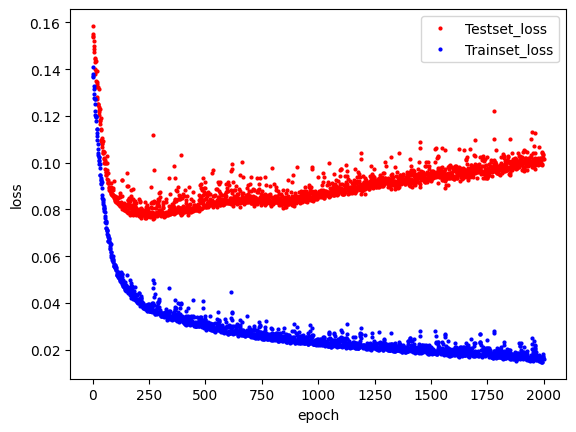

In [11]:
# x 값을 지정하고 검증셋의 오차를 빨강, 학습셋의 오차를 파랑
# "o" : 사용되는 점 모양
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 자동 중단

In [12]:
# EarlyStopping() : 학습이 진행되어도 테스트셋 오차가 줄어들지 않으면 학습이 자동으로 멈춤 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 학습이 언제 자동 중단 될지 설정
# monitor : model.fit() 실행 결과 중 어떤 것을 이용할지 정한다. 
# patience : 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료시킬지 정한다. 

# 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료하라는 의미
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정한다. 
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, moniter='val_loss', verbose=0, save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.8260 - accuracy: 0.8096 - val_loss: 0.5670 - val_accuracy: 0.7562
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.7878 - val_loss: 0.4593 - val_accuracy: 0.8462
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.4258 - accuracy: 0.8614 - val_loss: 0.4101 - val_accuracy: 0.8615
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.8599 - val_loss: 0.3646 - val_accuracy: 0.8515
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3278 - accuracy: 0.8766 - val_loss: 0.3216 - val_accuracy: 0.8923
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2891 - accuracy: 0.9020 - val_loss: 0.2705 - val_accuracy: 0.8992
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.9089 - val_loss: 0.2410 - val_accuracy: 0.9162
Epoch 8/2000
8/8 [=

In [14]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 838us/step - loss: 0.0750 - accuracy: 0.9785
Test accuracy: 0.9784615635871887
